In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import stumpy

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

# Discovering time series reverse complements

This tutorial explores the **"Discovering time series reverse complements"** case study from the research paper:  
(The Swiss Army Knife of Time Series Data Mining: Ten Useful Things You Can Do with the Matrix Profile and Ten Lines of Code (see Section 3.3))[1]

Unlike Semordnilaps, which are “flipped” in the time axis, are there patterns that are flipped upsidedown  
in the value axis? We call such patterns **Time Series Reverse Complements (TSRCs)**.

Here is approximately 2 min from a dataset from a hip-worn accelerometer of quotidian activity from USC-HAD Database (Zhang and Sawchuk 2012)[2].

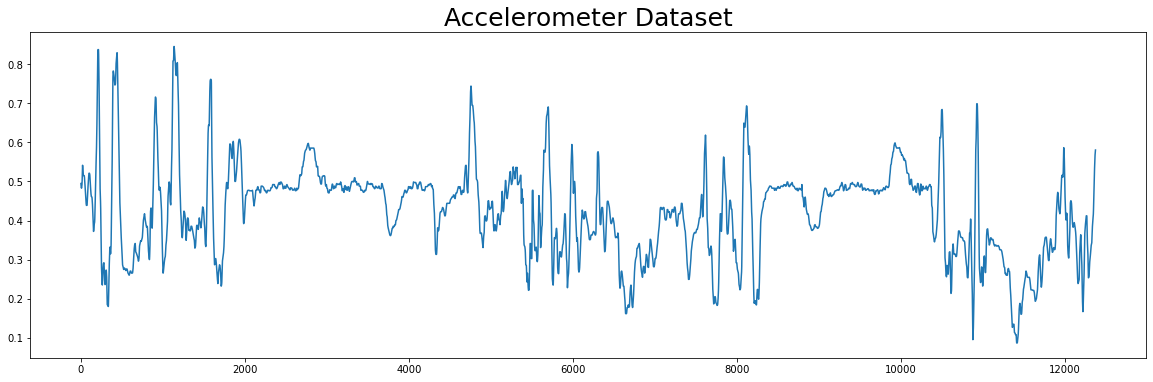

In [3]:
T = pd.read_pickle("dataset/33_1_2m.pkl")
plt.plot(T)
plt.title("Accelerometer Dataset", fontsize='25')
plt.show()

**Where is the best motif of length 20-s?** Let's calculate best motifs from this datset.

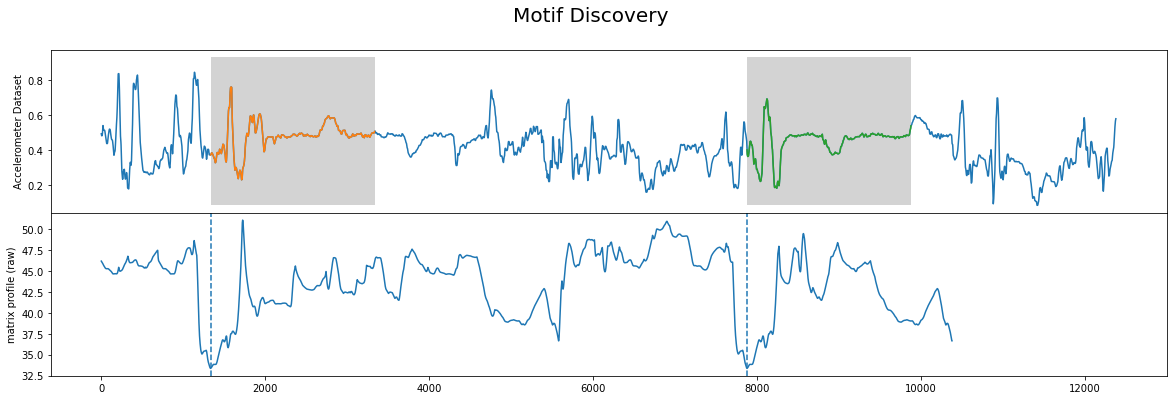

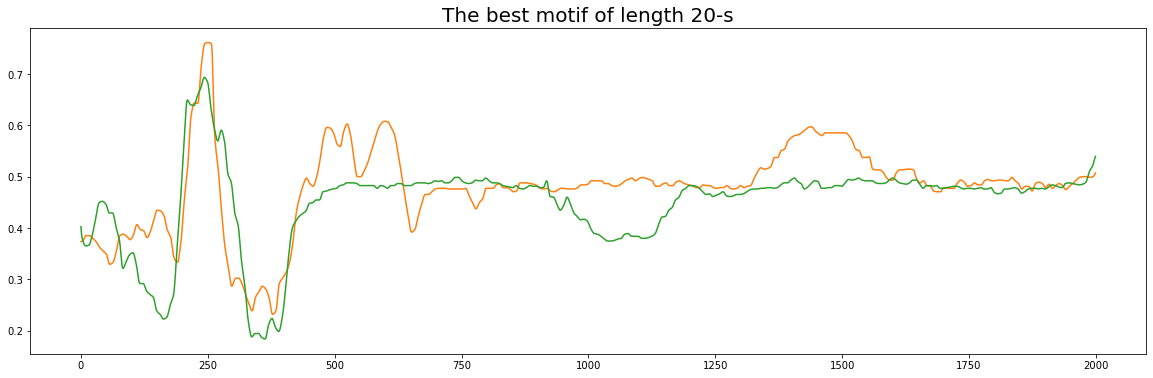

In [11]:
m = 2000
mp = stumpy.stump(T, m)
idx_motifA = np.argmin(mp[:, 0])
idx_motifB = mp[:, 1][idx_motifA]
x = np.arange(len(T))

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif Discovery', fontsize='20')
axs[0].plot(T)
axs[0].plot(x[idx_motifA:idx_motifA+m], T[idx_motifA:idx_motifA+m])
axs[0].plot(x[idx_motifB:idx_motifB+m], T[idx_motifB:idx_motifB+m])
axs[0].set_ylabel("Accelerometer Dataset")
rect = Rectangle((idx_motifA, np.min(T)), m, np.max(T), facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((idx_motifB, np.min(T)), m, np.max(T), facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].plot(mp[:, 0])
axs[1].axvline(idx_motifA, linestyle="dashed")
axs[1].axvline(idx_motifB, linestyle="dashed")
axs[1].set_ylabel("matrix profile (raw)")
plt.show()

plt.plot(T[idx_motifA:idx_motifA+m], color="C1")
plt.plot(T[idx_motifB:idx_motifB+m], color="C2")
plt.title("The best motif of length 20-s", fontsize='20')
plt.show()

The best motif of length 20-s is **not well conserved**, and almost looks like two random subsequences.  
This is unsurprising, apart from dance or athletic performances, we would not
expect human behavior to faithfully repeat over such an extended time scale.  

We also searched for the best **TSRC pattern** of the same length.

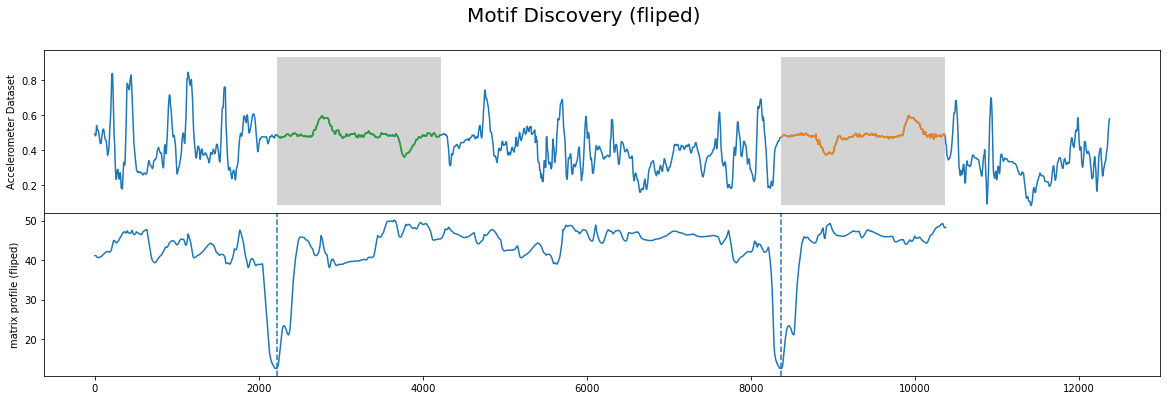

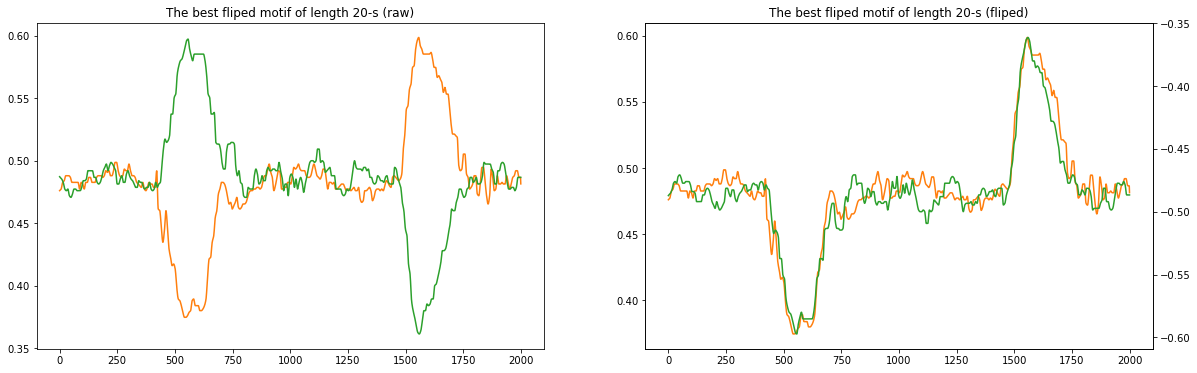

In [16]:
T2 = T*(-1)
mp = stumpy.stump(T,  m, T2, ignore_trivial=False)
idx_motifA = np.argmin(mp[:, 0])
idx_motifB = mp[:, 1][idx_motifA]

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif Discovery (fliped)', fontsize='20')
axs[0].plot(T)
axs[0].plot(x[idx_motifA:idx_motifA+m], T[idx_motifA:idx_motifA+m])
axs[0].plot(x[idx_motifB:idx_motifB+m], T[idx_motifB:idx_motifB+m])
axs[0].set_ylabel("Accelerometer Dataset")
rect = Rectangle((idx_motifA, np.min(T)), m, np.max(T), facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((idx_motifB, np.min(T)), m, np.max(T), facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].plot(mp[:, 0])
axs[1].axvline(idx_motifA, linestyle="dashed")
axs[1].axvline(idx_motifB, linestyle="dashed")
axs[1].set_ylabel("matrix profile (fliped)")
plt.show()

fig1, axs = plt.subplots(1, 2)
axs[0].plot(T[idx_motifA:idx_motifA+m], color="C1")
axs[0].plot(T[idx_motifB:idx_motifB+m], color="C2")
axs[0].set_title("The best fliped motif of length 20-s (raw)")

axs_ = axs[1].twinx()
axs[1].plot(T[idx_motifA:idx_motifA+m], color="C1")
axs_.plot(T[idx_motifB:idx_motifB+m]*-1, color="C2")
axs[1].set_title("The best fliped motif of length 20-s (fliped)")
plt.show()

Fliped series are stunningly well conserved.  

**What is the mechanism that produced this pattern**?  
At about 22 s into the recording, the user stepped into an elevator. The first bump is the “jolt” of the elevator ascending,  
followed by the “dip-and-recover” as the elevator decelerated the desired floor. 
After about 1 min, the user took a **return trip**, descending the same number of floors.


## References
[1]: [The Swiss Army Knife of Time Series Data Mining: Ten Useful Things You Can Do with the Matrix Profile and Ten Lines of Code (see Section 3.3)"](https://www.cs.ucr.edu/~eamonn/Top_Ten_Things_Matrix_Profile.pdf)  

[2]: [Zhang and Sawchuk 2012](https://sipi.usc.edu/had/)